In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
import scipy
print(scipy.__version__)

1.7.3


In [26]:
!pip install --upgrade scipy

You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

EXERCISE 1.  Belirli bir sektördeki saatlik ücretler normal olarak ortalama 13,20$ ve standart sapma 2,50$ ile dağıtılır. Bu sektördeki bir şirket 40 işçi çalıştırıyor ve onlara saatte ortalama 12,20 dolar ödüyor. Bu şirket standartların altında ücret ödemekle suçlanabilir mi? Bir α = .01 seviye testi kullanın. (Wackerly, Ör.10.18)

KONTROL: istatistik: -2.5298221281347035, pdeğeri= 0.005706018193000826

In [27]:
mu=13.20
s=2.50
alpha = 0.01
size=40

In [28]:
# H0: mu = 13,20
# H1: mu <13,20

In [34]:
xbar=12.20

In [35]:
s_error = s/np.sqrt(40)
s_error

0.3952847075210474

In [36]:
z_test = (xbar - 13.20) / (s/np.sqrt(40))
z_test

-2.5298221281347035

In [37]:
stats.norm.cdf(z_test)

0.005706018193000826

In [38]:
p_value=stats.norm.cdf(12.20, loc=13.20, scale=s_error)
p_value

0.005706018193000826

In [39]:
alpha=0.01
if p_value<alpha :
  print("reject the null")
else:
  print("fail to reject the null")

reject the null


EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

ALIŞTIRMA 2. İki tip zemin için serbest basınç deneylerinden elde edilen kesme mukavemeti ölçümleri, aşağıdaki belgede gösterilen sonuçları vermiştir (metre kare başına ton cinsinden ölçümler). Zeminler, %1 anlamlılık düzeyinde ortalama kesme dayanımına göre farklılık gösteriyor mu?

İki tip zemin için sonuçlar

KONTROL: istatistik: 5.1681473319343345, pvalue= 2.593228732352821e-06

Independent Samples T Test Bağımsız Numuneler T Testi

In [40]:
df=pd.read_csv("soil - Sheet1.csv")

In [41]:
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [42]:
# H0: mu1 = mu2

# H1: mu1 != mu2

In [43]:
df.Soil1.mean()

1.6918000000000002

In [44]:
df.Soil2.mean()

1.4171142857142855

In [45]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.
leveneTest = stats.levene(df["Soil1"][:30],df["Soil2"] )  
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [46]:
indTest = stats.ttest_ind(df.Soil1,df.Soil2 , equal_var=True,nan_policy="omit")  
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [47]:
 p_value=indTest.pvalue
 p_value

2.5932287323528147e-06

In [48]:
alpha=0.01
if p_value<alpha :
  print("reject the null")
else:
  print("fail to reject the null")

reject the null


EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

 Aşağıdaki veri seti Dünya Bankası tarafından sağlanan verilere dayanmaktadır (https://datacatalog.worldbank.org/dataset/education-statistics). Dünya Bankası Edstatları.  2015 PISA Testi Veri Seti

Her kıta grubu (AS, EU, AF, NA, SA, OC) için tanımlayıcı istatistikleri (bir veri kümesinin dağılımının merkezi eğilimi, dağılımı ve şekli) alın.
Avrupa (AB) ve Asya (AS) ülkeleri arasında matematik puanları için (ortalama olarak) herhangi bir fark olup olmadığını belirleyin (normallik ve eşit varyanslar varsayalım). Yan yana kutu çizimleri çizin.
KONTROL: istatistik=0.870055317967983, pdeğer=0.38826888111307345

In [51]:
df=pd.read_csv("2015 PISA Test - Sheet1.csv")
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [52]:
df.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [53]:
df.groupby("Continent_Code")["Math"].mean()

Continent_Code
AF    363.212100
AS    466.216647
EU    477.981449
OC    494.559750
SA    402.887700
Name: Math, dtype: float64

In [54]:
df.groupby("Continent_Code")["Math"].std()

Continent_Code
AF     5.099513
AS    64.356490
EU    35.150403
OC     0.938401
SA    18.128894
Name: Math, dtype: float64

In [56]:
df.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


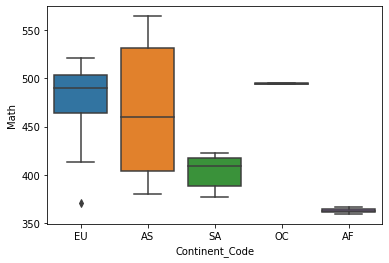

In [57]:
sns.boxplot(x="Continent_Code", y="Math", data=df);

In [58]:
Math_AS=df[df["Continent_Code"]=="AS"].Math
Math_AS

1     427.4827
11    531.2961
25    403.8332
27    547.9310
30    386.1096
33    469.6695
35    380.2590
36    532.4399
37    459.8160
38    524.1062
39    396.2497
43    543.8078
49    446.1098
56    402.4007
59    564.1897
63    415.4638
69    494.5183
Name: Math, dtype: float64

In [59]:
Math_EU=df[df["Continent_Code"]=="EU"].Math
Math_EU

0     413.1570
4     496.7423
5     506.9844
6     441.1899
9     521.2506
14    437.1443
15    492.3254
16    505.9713
17    511.0876
20    485.8432
21    519.5291
22    511.0769
23    492.9204
24    492.4785
26    453.6299
28    464.0401
29    476.8309
31    503.7220
32    488.0332
34    489.7287
40    478.3834
41    485.7706
42    482.3051
44    419.6635
46    371.3114
47    478.6448
48    417.9341
50    512.2528
51    501.7298
54    504.4693
55    491.6270
57    443.9543
58    494.0600
60    475.2301
61    509.9196
62    493.9181
66    420.4540
Name: Math, dtype: float64

In [60]:
leveneTest = stats.levene(Math_EU,Math_AS )
leveneTest

LeveneResult(statistic=14.300030628780675, pvalue=0.0004037413184451079)

In [61]:
indTest = stats.ttest_ind(Math_EU,Math_AS, equal_var=True)   
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [62]:
 p_value=indTest.pvalue
 p_value

0.38826888111307345

In [63]:
alpha=0.05
if p_value<alpha :
  print("reject the null")
else:
  print("fail to reject the null")

fail to reject the null


EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128



ALIŞTIRMA 4. Örnek veri seti, dört konu alanı için (100 puan üzerinden) yerleştirme testi puanlarına sahiptir: İngilizce, Okuma, Matematik ve Yazma. Örneklemdeki öğrenciler, üniversiteye kayıt olduklarında 4 yerleştirme sınavının hepsini tamamlamıştır. Özellikle İngilizce ve Matematik bölümleriyle ilgilendiğimizi ve öğrencilerin İngilizce veya Matematik sınavlarında ortalama olarak daha yüksek puan alıp almadıklarını belirlemek istediğimizi varsayalım. İki testin ortalamasında anlamlı bir fark olup olmadığını test etmek için eşleştirilmiş bir t testi kullanabiliriz.

Örnek Veri Kümesi 2014

KONTROL: istatistik=36.312568981719856, pvalue=3.0710987192210606e-128

In [64]:
df=pd.read_csv("students_2014 - students_2014.csv")
df.sample(3)

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
276,22961,11/30/1993,6-Aug-2012,08-May-2017,3.0,broadcast journalism,0.0,1,69.73,221.92,...,82.18,81.02,66.15,79.47,Out of state,0.0,3.0,40.0,11.0,6.0
138,32219,8/9/1993,4-Aug-2014,11-May-2020,1.0,Family and Consumer Science,0.0,0,70.40,246.64,...,82.45,89.05,85.19,75.51,Out of state,1.0,NaN,NaN,6.0,NaN
91,25740,10/26/1994,4-Aug-2014,11-May-2020,1.0,NaN,1.0,0,66.97,154.81,...,82.56,89.88,81.44,NaN,In state,0.0,3.0,28.0,4.0,3.0


In [65]:
df.isnull().sum()

ids               0
bday              8
enrolldate       29
expgradate       29
Rank             29
Major           159
Gender            9
Athlete           0
Height           27
Weight           59
Smoking          24
Sprint           61
MileMinDur       43
English          26
Reading          10
Math             13
Writing          31
State            27
LiveOnCampus     21
HowCommute      188
CommuteTime     188
SleepTime        32
StudyTime        42
dtype: int64

In [66]:
df.English.mean()

82.78755501222494

In [67]:
df.Math.mean()

65.46800947867298

In [68]:
stats.shapiro(df.Math.dropna())

ShapiroResult(statistic=0.9952573776245117, pvalue=0.22645071148872375)

In [69]:
stats.shapiro(df.English.dropna())

ShapiroResult(statistic=0.9965985417366028, pvalue=0.5434104800224304)

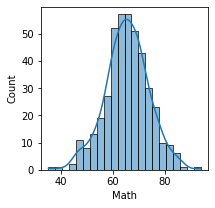

In [70]:
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.histplot(x="Math",data=df,kde=True)

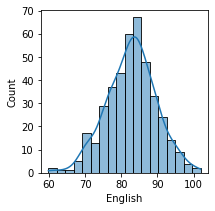

In [71]:
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.histplot(x="English",data=df,kde=True)

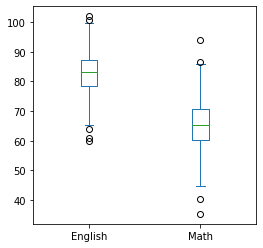

In [72]:
df[['English', 'Math']].plot(kind='box', figsize=(4,4));

In [73]:
#hypothesis H0: m1=m2 H1: m1!=m2(two side)

In [74]:
indTest = stats.ttest_rel(df.English,df.Math,nan_policy="omit")   
indTest

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)

In [75]:
p_value=indTest.pvalue
p_value

3.071098719220689e-128

In [76]:
alpha=0.05
if p_value<alpha :
  print("reject the null")
else:
  print("fail to reject the null")

reject the null
